# __Linear Regression__
##__Bike Share Case Study__

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.

So, it have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from pathlib import Path
# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.special import jv

from sklearn.model_selection import train_test_split #train data set sampler

from sklearn.preprocessing import MinMaxScaler  #minmaxScaler

import statsmodels.api as sm  #statsModel

from sklearn.feature_selection import RFE #RFE
from sklearn.linear_model import LinearRegression #LineaerRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading and understanding the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Linear_Regression_Code/BikeSharingCaseStudy/day.csv', low_memory=False)
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### Checking the data type of all the columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking the shape of the data

In [5]:
df.shape

(730, 16)

# Data Cleaning of the data set



As part of data cleaning activity following steps will be performed:
- Check the null values in all the columns
- Drop the columns having one unique value only as it can't contribute in the analysis
- Validate the internal rule
- Drop the columns which will not contribute in the analysis


### using cnt as target variable


### Checking the null values in all the columns

In [6]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


### Checking the unique values of all the columns to check and confirm that there is no other wrong/bufer value

#### Details from the data dictionary about the columns for unique values:
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday(i.e. 1) or not(i.e. 0)
- weekday : day of the week (i.e. 0 to 6)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [7]:
season_uniq_vals = df['season'].unique()
season_uniq_vals

array([1, 2, 3, 4])

In [8]:
yr_uniq_vals = df['yr'].unique()
yr_uniq_vals

array([0, 1])

In [9]:
mnth_uniq_vals = df['mnth'].unique()
mnth_uniq_vals

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [10]:
holiday_uniq_vals = df['holiday'].unique()
holiday_uniq_vals

array([0, 1])

In [11]:
weekday_uniq_vals = df['weekday'].unique()
weekday_uniq_vals

array([6, 0, 1, 2, 3, 4, 5])

In [12]:
workingday_uniq_vals = df['workingday'].unique()
workingday_uniq_vals

array([0, 1])

In [13]:
weathersit_uniq_vals = df['weathersit'].unique()
weathersit_uniq_vals

array([2, 1, 3])

Dropping the columns that are not adding values in the analysis
- instant: As it is having indexes as the unique values which can not not add any value in the analysis
- dteday: As columns yr, mnth and weekday are already given to peform the analysis. Due to which, it doesn't make any sense to have separate column to have the date.
- casual: As cnt column is already having total count of casual and registred coulmn. hence, removing this coulmn also
- registered: As cnt column is already having total count of casual and registred coulmn. hence, removing this coulmn also

In [14]:
# Dropping the columns 'instant','dteday', 'casual', and 'registered' as it will not add enough value in the analysis.
df.drop(['instant','dteday', 'casual', 'registered'], axis=1, inplace=True)

In [15]:
# Checking the shape of the data frame again after dropping the column
df.shape

(730, 12)

In [16]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Visualising the Data

- PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

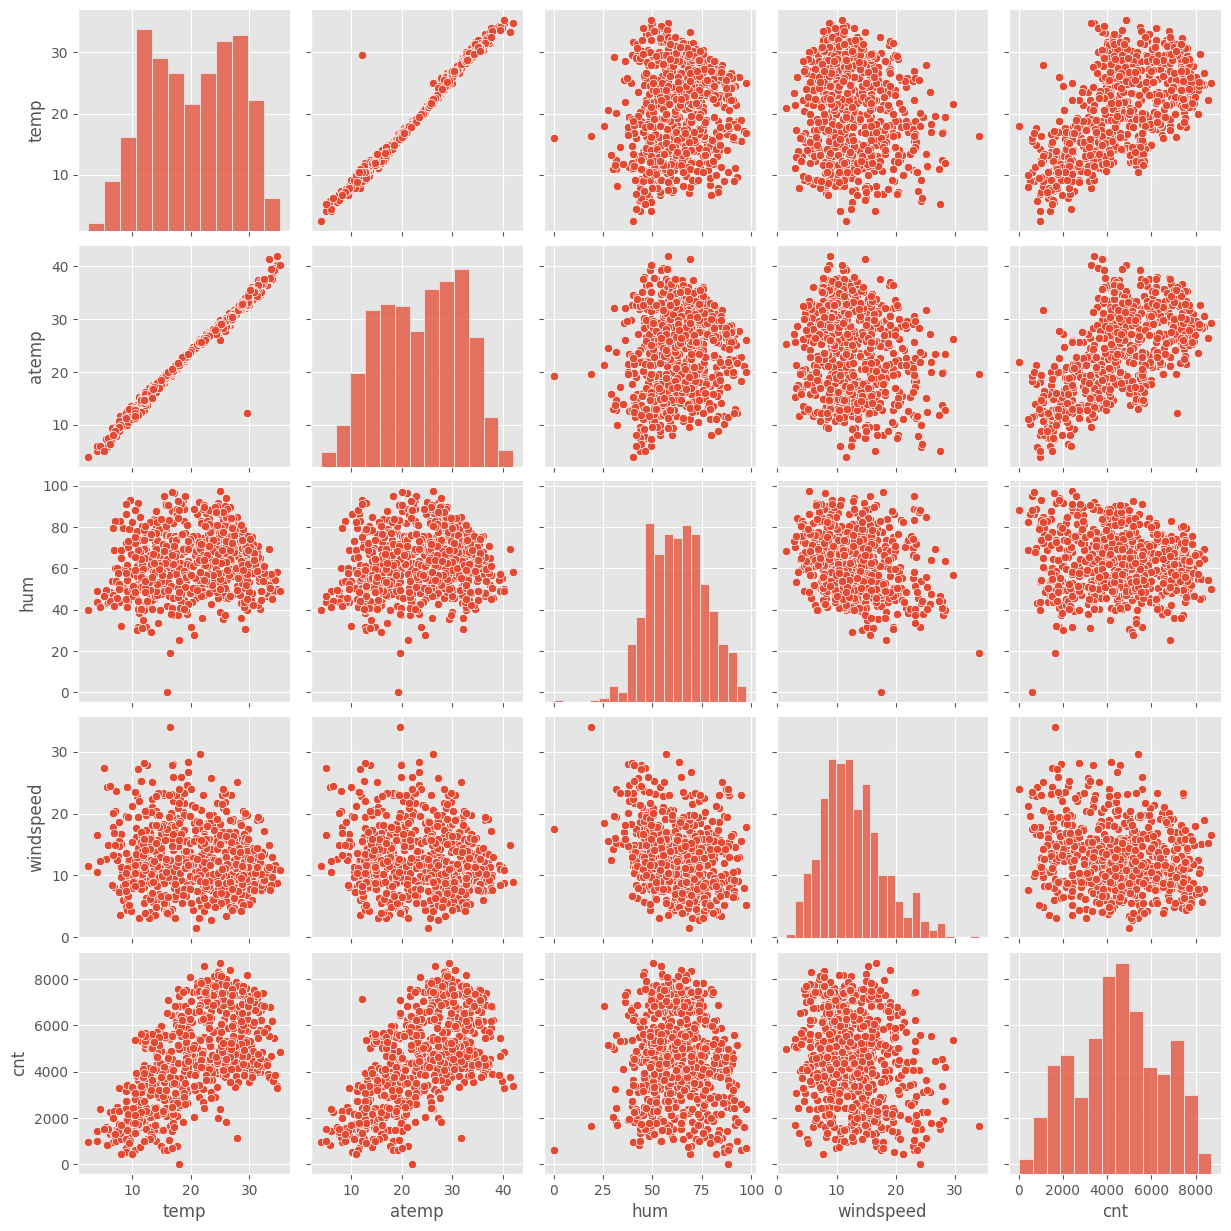

In [17]:
plt.style.use("ggplot")

sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

#### Observation :
- From above, we can conclude that independent variable atemp and temp are having direct relationship.
- When temp will increase/decrase then atemp will also increase/decrease.

Hence, by considering above observation we can remove column "atemp" as well

In [18]:
df.drop(["atemp"], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


### Visualising the categorical variable using box plot

Categorical variables:
  - season
  - mnth
  - holiday
  - weekday
  - workingday
  - weathersit

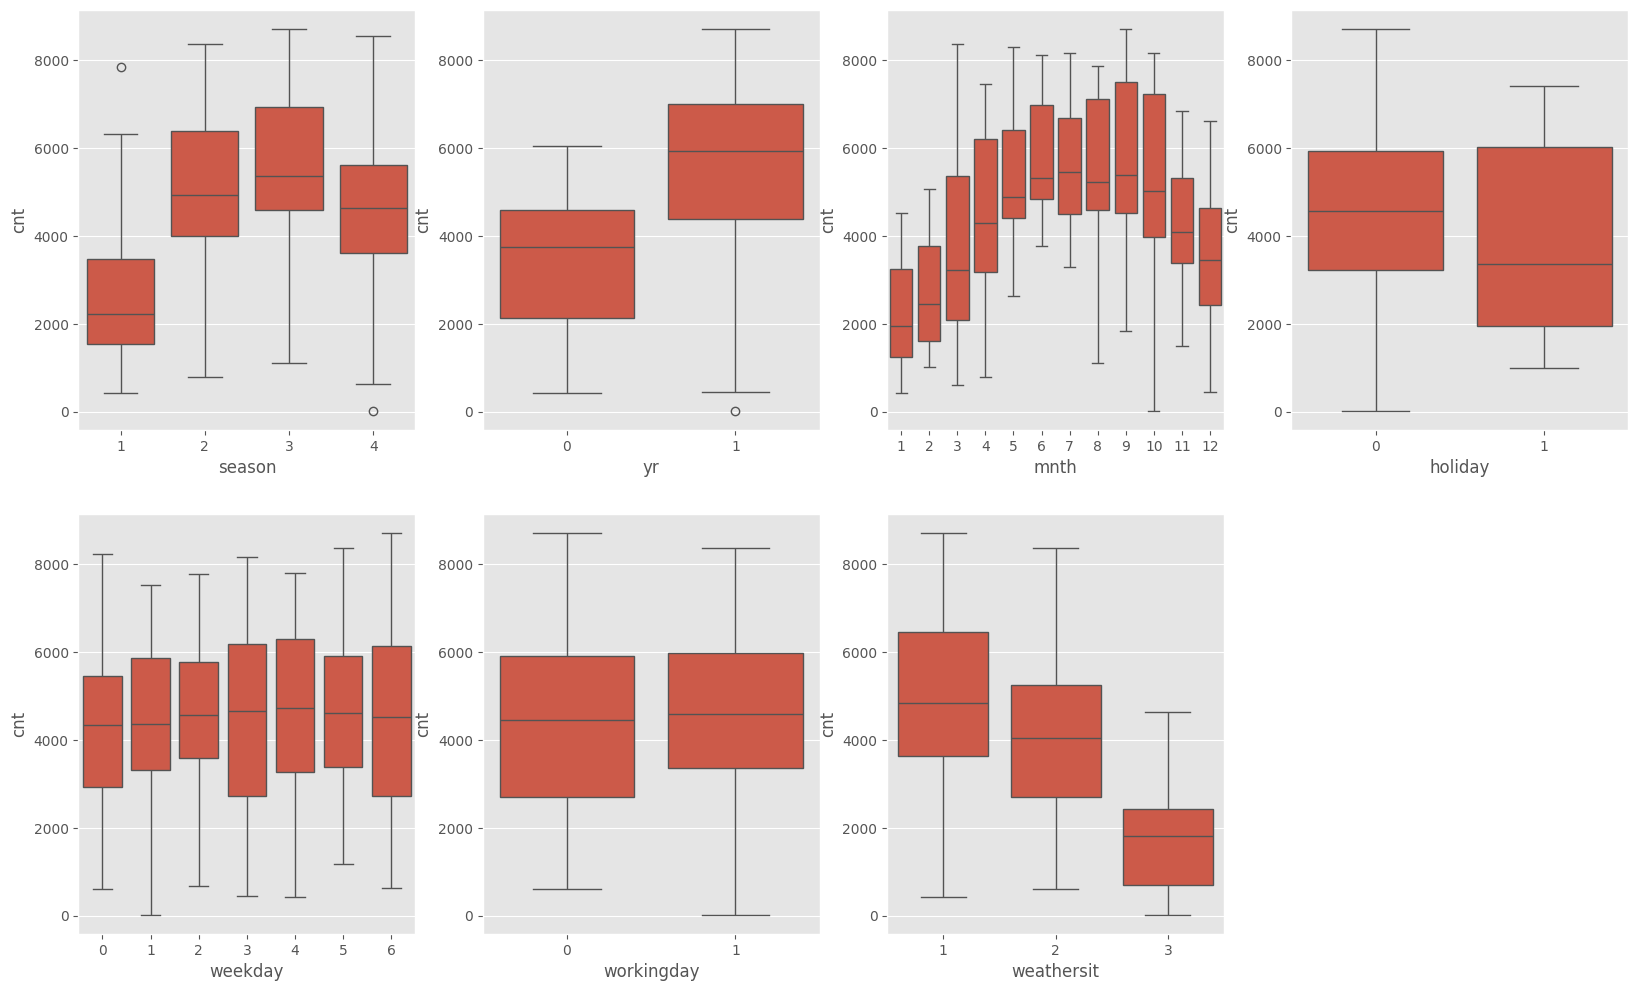

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.show()

#### Creating the barplot to visualize the categorical variable

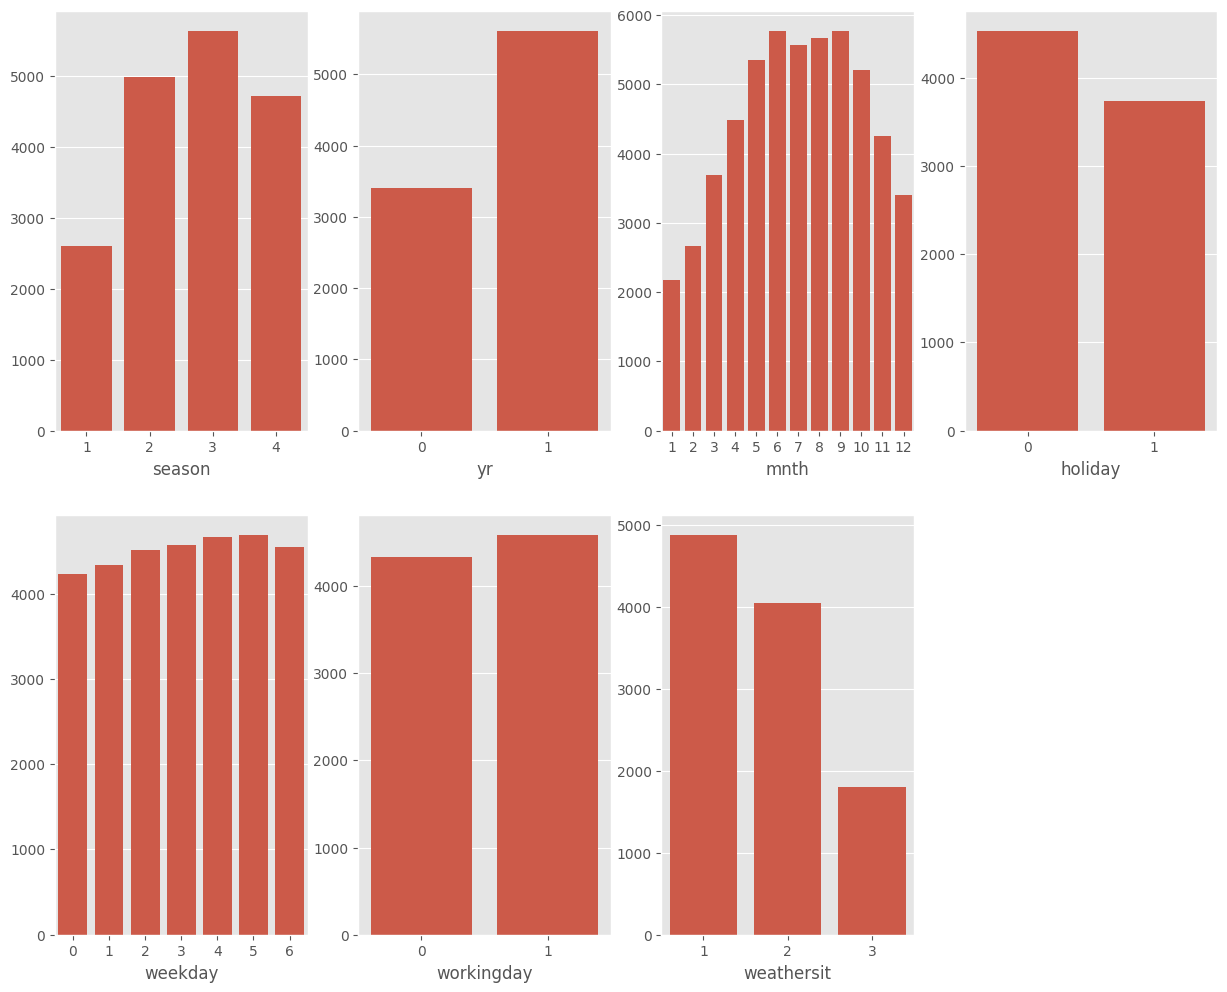

In [21]:
plt.figure(figsize=(15, 12))
plt.subplot(2,4,1)
season = df.groupby(['season'])['cnt'].mean()
sns.barplot(x=season.index, y=season.values)

plt.subplot(2,4,2)
year = df.groupby(['yr'])['cnt'].mean()
sns.barplot(x=year.index, y=year.values)

plt.subplot(2,4,3)
mnth = df.groupby(['mnth'])['cnt'].mean()
sns.barplot(x=mnth.index, y=mnth.values)

plt.subplot(2,4,4)
holiday = df.groupby(['holiday'])['cnt'].mean()
sns.barplot(x=holiday.index, y=holiday.values)

plt.subplot(2,4,5)
weekday = df.groupby(['weekday'])['cnt'].mean()
sns.barplot(x=weekday.index, y=weekday.values)

plt.subplot(2,4,6)
workingday = df.groupby(['workingday'])['cnt'].mean()
sns.barplot(x=workingday.index, y=workingday.values)

plt.subplot(2,4,7)
weathersit = df.groupby(['weathersit'])['cnt'].mean()
sns.barplot(x=weathersit.index, y=weathersit.values)

plt.show()

### Observations:
- Most of the bookings has been done during the month of may, june, july, aug, sep and oct.
- Season in fall(3) has median more than 5000 and count of rental bikes is more than 6000
- If its a working day then more bikes are rented
- No bikes are rented for weather situation (4)
- Most of the bikes get booked When weather is (1) clear, Few clouds, Partly cloudy, Partly cloudy.


### Creating Dummy Variables
- Season variable is having 4 levels(i.e. 1:'spring', 2:'summer', 3:'fall', 4:'winter')
- weekday is having 7 values(i.e. 0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat')
- weathersit: 1: 'clear', 2: 'mistCloud', 3: 'lightRain', 4: 'HeavyRain'
- mnth: 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'

In [22]:
# Mapping the values of the categorical variables
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mistCloud', 3: 'lightRain', 4: 'HeavyRain'})

# mapping the weekday column as per unique vals of weekday column
# this is determined with holiday=0 and workingday=0 weekday coming as 0,6(which is weekend)
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# convert months
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Converting these to category variables first
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['mnth'] = df['mnth'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [24]:
# Creating the dummy variables and dropping first variable
season_dummy = pd.get_dummies(df['season'], drop_first = True)
weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first = True)
weekday_dummy = pd.get_dummies(df['weekday'], drop_first = True)
month_dummy = pd.get_dummies(df['mnth'], drop_first = True)

In [25]:
season_dummy = season_dummy.replace({True: 1, False: 0})
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
weathersit_dummy = weathersit_dummy.replace({True: 1, False: 0})
weathersit_dummy.head()

,lightRain,mistCloud
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [27]:
weekday_dummy = weekday_dummy.replace({True: 1, False: 0})
weekday_dummy.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [28]:
month_dummy = month_dummy.replace({True: 1, False: 0})
month_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Assumptions:
- For season_dummy, if "spring", "summer", "winter" all are False/0, it can be considered as "fall"
- For weathersit_dummy, if "lightRain" and "mistClound" as False/0 then its "clear" as weathersit, and we have already seen above that its never heavy rain
- For weekday_dummy, if all are False/0 then its "Fri"
- For month_dummy, if all are False/0 then its "Apr"

In [29]:
# Adding the results into the original dataframe
df = pd.concat([df, season_dummy, weathersit_dummy, weekday_dummy, month_dummy], axis = 1)

In [30]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,mistCloud,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,mistCloud,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# Dropping the 'season','weathersit', 'weekday' and 'mnth' as we have created the dummies for these columns
df.drop(['season', 'weathersit', 'weekday','mnth'], axis = 1, inplace = True)

### Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [32]:
# Specifying this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 150)

### Rescaling the Features
Here we can see that except for temp,hum,windspeed, all the columns have small integer values. Lets convert other large values by rescaling them using min-max scaling to get comparable scales.

In [33]:
scaler = MinMaxScaler()

In [34]:
# Applying scaler() to all the columns except with boolean values
scaler_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
726,1,0,1,0.204943,0.612987,0.274350,0.321623,1,0,0,...,1,0,0,0,0,0,0,0,0,0
589,1,0,1,0.815938,0.566667,0.234647,0.778945,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,1,0.311677,0.467099,0.588452,0.205602,1,0,0,...,0,0,0,0,0,1,0,0,0,0
261,0,0,1,0.591581,0.716883,0.266662,0.495956,0,0,0,...,0,0,0,0,0,0,0,0,0,1
608,1,0,0,0.858414,0.663203,0.187179,0.689243,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.494118,0.033333,0.690196,0.523083,0.649428,0.340972,0.489320,0.258824,0.250980,0.241176,...,0.070588,0.086275,0.098039,0.088235,0.082353,0.070588,0.092157,0.084314,0.090196,0.078431
std,0.500456,0.179682,0.462867,0.243284,0.145042,0.158926,0.232820,0.438419,0.434003,0.428217,...,0.256387,0.281045,0.297660,0.283915,0.275172,0.256387,0.289531,0.278131,0.286744,0.269113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.306776,0.545021,0.229511,0.335084,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.535491,0.646584,0.323711,0.496620,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.730987,0.751083,0.429488,0.652753,1.000000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the correlation coefficients to see which variables are highly correlated

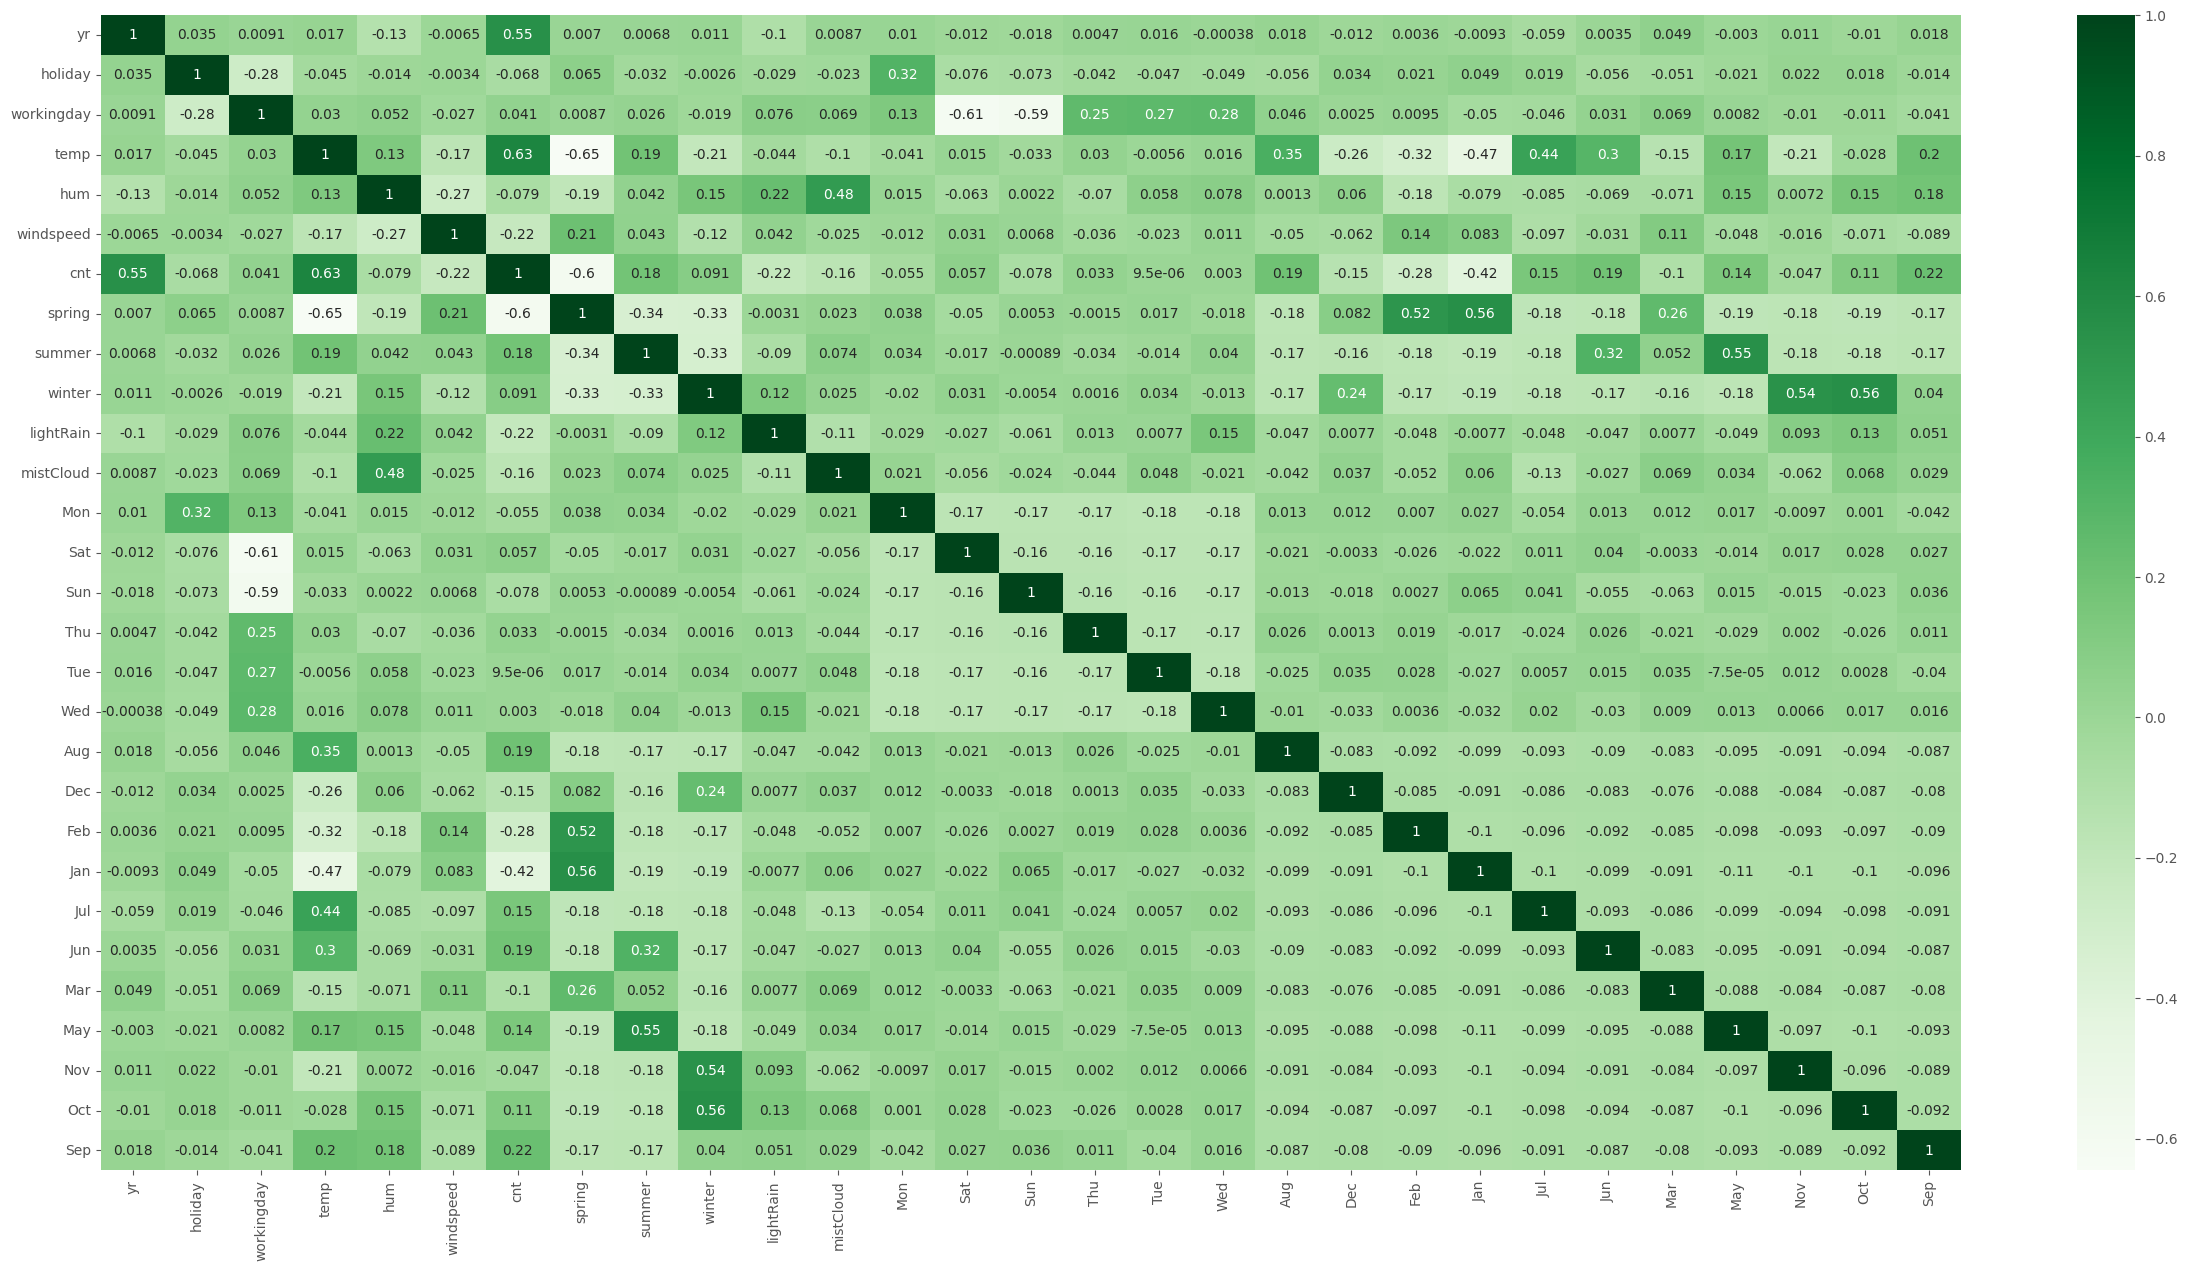

In [37]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(),cmap = "Greens", annot=True)
plt.show()

#### Insights:
- yr (0.55) and temp (0.63) is highly correlated to cnt and this is the target variable
- spring is correlated with jan (0.56), feb (0.52)
- summer is correlated with may (0.55)
- winter is correlated with oct (0.56), nov (0.54)

Pair plot of "cnt" and "temp", as we are picking temp as the first variable as its correlation is 0.63

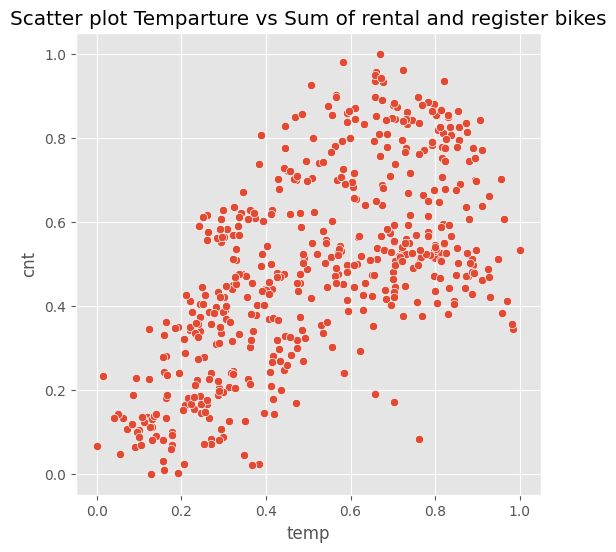

In [38]:
plt.figure(figsize=[6,6])
sns.scatterplot(x="temp", y="cnt", data=df_train)
plt.title('Scatter plot Temparture vs Sum of rental and register bikes')

plt.show()

### Dividing into X and Y sets for the model building
#### Build a linear model
##### Fit a regression line through the training data using statsmodels

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
# Adding constant to create a fitted model

X_train_lm = sm.add_constant(X_train[['temp']])

lr = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Checking the parameters obtained

lr.params

,0
const,0.174453
temp,0.601945


#### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

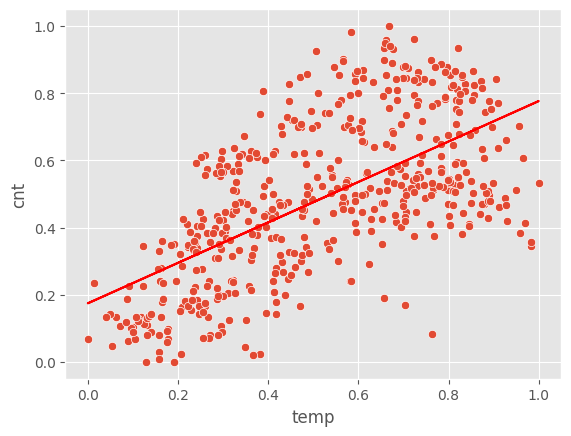

In [42]:
# Visualising the data with a scatter plot and the fitted regression line
sns.scatterplot(x=X_train_lm.iloc[:, 1], y=y_train)

plt.plot(X_train_lm.iloc[:, 1], lr.params['const'] + lr.params['temp']*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [43]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     332.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.58e-57
Time:                        12:57:11   Log-Likelihood:                 148.58
No. Observations:                 510   AIC:                            -293.2
Df Residuals:                     508   BIC:                            -284.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1745      0.019      9.163      0.0

### Adding another variable

The R-squared value obtained is `0.394`. Since we have so many variables, let's try adding the second most highly correlated variable, i.e. `yr`

In [44]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [45]:
# Building a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

,0
const,0.054834
temp,0.593021
yr,0.251532


In [46]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     558.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          6.43e-129
Time:                        12:57:11   Log-Likelihood:                 317.08
No. Observations:                 510   AIC:                            -628.2
Df Residuals:                     507   BIC:                            -615.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0548      0.015      3.716      0.0

> R-Square value is now 0.69, now lets add __all other remaining variables__ of the columns

In [47]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

,0
const,0.285151
yr,0.236893
holiday,0.042630
workingday,0.103662
temp,0.412247
hum,-0.175709
windspeed,-0.152291
spring,-0.104454
summer,0.011939
winter,0.090287


In [48]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     98.94
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.58e-177
Time:                        12:57:12   Log-Likelihood:                 499.14
No. Observations:                 510   AIC:                            -942.3
Df Residuals:                     482   BIC:                            -823.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2852      0.038      7.437      0.0

> As the notes above mentioned the above summary indicates that there are strong multicollinearity problems, lets do RFE to limit columns and reduce the risk of overfitting by choosing the most important features

### RFE from sklearn


In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)


In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('lightRain', True, 1),
 ('mistCloud', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thu', False, 10),
 ('Tue', False, 11),
 ('Wed', False, 12),
 ('Aug', False, 13),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1)]

In [51]:
X_train.columns[~rfe.support_]

Index(['holiday', 'summer', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Feb',
       'Jan', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [52]:
# Get x_train.Columns with RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'lightRain', 'mistCloud', 'Sat', 'Dec', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [53]:
# X_test ref with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
X_train_rfe

,yr,workingday,temp,hum,windspeed,spring,winter,lightRain,mistCloud,Sat,Dec,Jul,Nov,Sep
726,1,1,0.204943,0.612987,0.274350,1,0,0,1,0,1,0,0,0
589,1,1,0.815938,0.566667,0.234647,0,0,0,0,0,0,0,0,0
60,0,1,0.311677,0.467099,0.588452,1,0,0,0,0,0,0,0,0
261,0,1,0.591581,0.716883,0.266662,0,0,0,1,0,0,0,0,1
608,1,0,0.858414,0.663203,0.187179,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,0.407519,0.729437,0.235894,0,1,0,0,0,0,0,1,0
496,1,0,0.611185,0.499135,0.207683,0,0,0,0,1,0,0,0,0
25,0,1,0.158112,0.896104,0.559626,1,0,1,0,0,0,0,0,0
507,1,1,0.686334,0.804762,0.164117,0,0,0,1,0,0,0,0,0


In [55]:
# adding cols Jan Feb based on their ranking
X_train_rfe['Jan'] = X_train['Jan']
X_train_rfe['Feb'] = X_train['Feb']

In [56]:
X_train_rfe

,yr,workingday,temp,hum,windspeed,spring,winter,lightRain,mistCloud,Sat,Dec,Jul,Nov,Sep,Jan,Feb
726,1,1,0.204943,0.612987,0.274350,1,0,0,1,0,1,0,0,0,0,0
589,1,1,0.815938,0.566667,0.234647,0,0,0,0,0,0,0,0,0,0,0
60,0,1,0.311677,0.467099,0.588452,1,0,0,0,0,0,0,0,0,0,0
261,0,1,0.591581,0.716883,0.266662,0,0,0,1,0,0,0,0,1,0,0
608,1,0,0.858414,0.663203,0.187179,0,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,0.407519,0.729437,0.235894,0,1,0,0,0,0,0,1,0,0,0
496,1,0,0.611185,0.499135,0.207683,0,0,0,0,1,0,0,0,0,0,0
25,0,1,0.158112,0.896104,0.559626,1,0,1,0,0,0,0,0,0,1,0
507,1,1,0.686334,0.804762,0.164117,0,0,0,1,0,0,0,0,0,0,0


In [57]:
# Now trying again training model with RFE selected variables
X_train_lm = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

,0
const,0.340705
yr,0.237137
workingday,0.048576
temp,0.387965
hum,-0.160273
windspeed,-0.148337
spring,-0.119037
winter,0.085115
lightRain,-0.241634
mistCloud,-0.054737


In [58]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.86e-187
Time:                        12:57:12   Log-Likelihood:                 493.72
No. Observations:                 510   AIC:                            -953.4
Df Residuals:                     493   BIC:                            -881.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3407      0.036      9.450      0.000       0.270       0.412
yr             0.2371      0.008     27.969      0.000       0.220       0.254
workingday     0.0486      0.011      4.235      0.000       0.026       0.071
temp           0.3880      0.034     11.281      0.000       0.320       0.456
hum           -0.1603      0.039     -4.124      0.000      -0.237      -0.084
windspeed     -0.1483      0.028     -5.244      0.000      -0.204      -0.093
spring        -0.1190      0.020     -5.988      0.000      -0.158      -0.080
winter         0.0851      0.014      5.885      0.000       0.057       0.114
lightRain     -0.2416      0.030     -8.068      0.000      -0.300      -0.183
mistCloud     -0.0547      0.011     -5.058      0.000      -0.076      -0.033
Sat            0.0554      0.015      3.690      0.000       0.026       0.085
Dec           -0.0670      0.020     -3.349      0.001      -0.106      -0.028
Jul           -0.0614      0.017     -3.551      0.000      -0.095      -0.027
Nov           -0.0896      0.019     -4.604      0.000      -0.128      -0.051
Sep            0.0586      0.016      3.572      0.000       0.026       0.091
Jan           -0.0625      0.023     -2.735      0.006      -0.107      -0.018
Feb           -0.0437      0.023     -1.939      0.053      -0.088       0.001
==============================================================================
Omnibus:                       88.233   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.000
Skew:                          -0.867   Prob(JB):                     8.41e-50
Kurtosis:                       5.761   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By looking at the p-values, it appears like some of the variables are not really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [59]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.27
2,temp,17.15
5,spring,5.51
4,windspeed,5.05
1,workingday,4.94
14,Jan,2.83
6,winter,2.76
15,Feb,2.49
8,mistCloud,2.29
0,yr,2.01


Lets start dropping features having VIF > 5 one by one

In [60]:
# Dropping hum as its vif is highest
X_train_rfe2 = X_train_rfe.drop('hum', axis=1)

In [61]:
# Build again fitted model
X_train_lm = sm.add_constant(X_train_rfe2)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.80e-184
Time:                        12:57:12   Log-Likelihood:                 485.07
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     494   BIC:                            -870.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2462      0.028      8.704      0.0

In [63]:
# Update VIFs with new x train variable
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.33
4,spring,5.16
3,windspeed,5.03
1,workingday,4.83
13,Jan,2.66
5,winter,2.44
14,Feb,2.44
0,yr,2.00
8,Sat,1.77
11,Nov,1.76


> VIF for temp feature is still more than 5, lets drop temp column as well

In [64]:
# Dropping temp as its vif is highest
X_train_rfe3 = X_train_rfe2.drop('temp', axis=1)

In [65]:
# Build again fitted model
X_train_lm = sm.add_constant(X_train_rfe3)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.99e-164
Time:                        12:57:12   Log-Likelihood:                 433.41
No. Observations:                 510   AIC:                            -836.8
Df Residuals:                     495   BIC:                            -773.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4901      0.018     27.267      0.0

In [67]:
# Update VIFs with new x train variable
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,4.95
2,windspeed,3.93
1,workingday,3.39
12,Jan,2.61
4,winter,2.44
13,Feb,2.43
0,yr,1.87
10,Nov,1.73
6,mistCloud,1.57
7,Sat,1.51


> Now VIF is under 5 but p-value for winter and Jul still seems to be high lets drop winter column first and check the summary

In [68]:
# Dropping Jul as its p-value is more
X_train_rfe4 = X_train_rfe3.drop('Jul', axis=1,)

In [69]:
# Build again fitted model
X_train_lm = sm.add_constant(X_train_rfe4)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [70]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          9.31e-165
Time:                        12:57:13   Log-Likelihood:                 432.70
No. Observations:                 510   AIC:                            -837.4
Df Residuals:                     496   BIC:                            -778.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4966      0.017     29.063      0.0

In [71]:
# Update VIFs with new x train variable
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,4.87
2,windspeed,3.87
1,workingday,3.30
11,Jan,2.61
12,Feb,2.43
4,winter,2.40
0,yr,1.86
9,Nov,1.72
6,mistCloud,1.56
7,Sat,1.49


p-value for winter is still higher lets drop winter

In [72]:
# Dropping winter as its vif is highest
X_train_rfe5 = X_train_rfe4.drop('winter', axis=1,)

In [73]:
# Build again fitted model
X_train_lm = sm.add_constant(X_train_rfe5)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     166.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.08e-165
Time:                        12:57:13   Log-Likelihood:                 431.59
No. Observations:                 510   AIC:                            -837.2
Df Residuals:                     497   BIC:                            -782.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5008      0.017     29.698      0.0

In [75]:
# Update VIFs with new x train variable
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,4.44
2,windspeed,3.86
1,workingday,3.25
10,Jan,2.55
11,Feb,2.37
0,yr,1.85
5,mistCloud,1.54
6,Sat,1.47
7,Dec,1.22
8,Nov,1.14


> Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [76]:
y_train_cnt = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

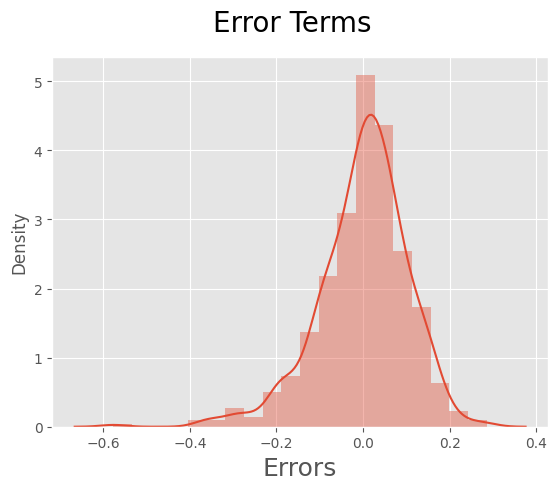

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [78]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [79]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.515982,0.018265,0.666667,0.516658,0.658588,0.360039,0.498851,0.219178,0.255708,0.251142,...,0.118721,0.054795,0.054795,0.077626,0.082192,0.118721,0.068493,0.077626,0.073059,0.091324
std,0.500889,0.134214,0.472484,0.229885,0.154854,0.161867,0.236772,0.414637,0.437258,0.434663,...,0.324202,0.228100,0.228100,0.268194,0.275286,0.324202,0.253169,0.268194,0.260830,0.288730
min,0.000000,0.000000,0.000000,-0.048868,0.286580,0.074379,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.323113,0.531602,0.240385,0.301159,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.516432,0.664070,0.335912,0.499698,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727720,0.766450,0.455779,0.690571,0.000000,1.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.956434,1.010390,0.864144,0.928287,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
#Selecting the variables that were part of final model.
col1=X_train_rfe5.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm_final = sm.add_constant(X_test)
X_test_lm_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 82 to 674
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       219 non-null    float64
 1   yr          219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   windspeed   219 non-null    float64
 4   spring      219 non-null    int64  
 5   lightRain   219 non-null    int64  
 6   mistCloud   219 non-null    int64  
 7   Sat         219 non-null    int64  
 8   Dec         219 non-null    int64  
 9   Nov         219 non-null    int64  
 10  Sep         219 non-null    int64  
 11  Jan         219 non-null    int64  
 12  Feb         219 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 24.0 KB


In [82]:
# Making predictions using the final model (lr_6)
y_pred = lr_6.predict(X_test_lm_final)

#### Model Evaluation
Actual Vs Model

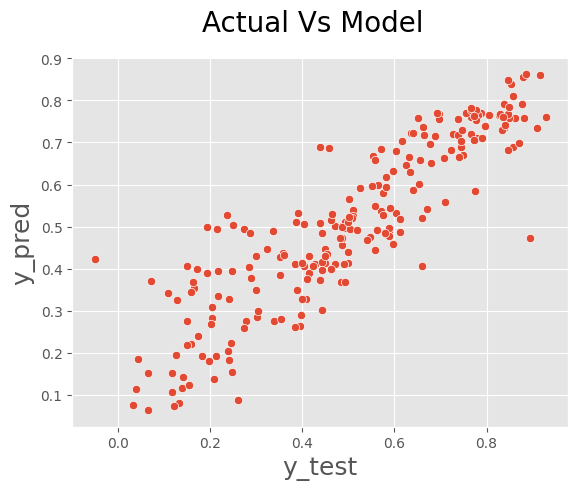

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.scatterplot(x=y_test, y=y_pred)

fig.suptitle('Actual Vs Model', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 18)
plt.show()


In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7865815277293503

In [85]:
# Adjusted R Square
n = X_test.shape[0]

p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7741493837135843

R Square for model is .79 and R square for actual is 0.80


R Square adjusted for model is .77 and R Square adjusted for actual is 0.79


We can see that the equation of our best fitted line is:

$ cnt = 0.2483  \times  yr + 0.0574  \times  workingday - 0.15 \times windspeed - 0.2192 \times spring - 0.2788 \times lightRain - 0.091 \times mictCloud + 0.0618 \times Sat - 0.1273 \times Dec - 0.1309 \times Nov + 0.0779 \times Sep - 0.1456 \times Jan - 0.092 \times Feb $


## Final Observation
- Bike demand is reduced in spring season and was at peak during fall
- Increase in demand of bike with upcoming year and most number of bikes are rented in May to October
- Most of the bikes are rented when weather is clear, few clouds or partly cloudy and no bikes is rented when there is heavy rain, thunderstorm or snow
- When there is light rain or light snow the demand of bike get reduced
- In case of high windspeed the demand of the bike to rent decreases
